<a href="https://colab.research.google.com/github/JainAnki/ADSMI-Notebooks/blob/main/GTSDB_Traffic_sign_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Data Science and Machine Intelligence
## A program by IIT Madras and TalentSprint
### Mini Project: Image classification using MLP and CNN

## Learning Objectives

At the end of the experiment, you will be able to :

* load and extract features of images

* implement simple neural network from Keras
* implement CNN using Keras

## Introduction

Traffic sign recognition is a challenging, real-world problem relevant for AI based transportation systems. Traffic signs show a wide range of variations between classes in terms of color, shape, and the presence of pictograms or text. However, there exist subsets of
classes (e.g., speed limit signs) that are very similar to each other. Further, the classifier
has to be robust against large variations in visual appearances due to changes in illumination, partial
occlusions, rotations, weather conditions etc. Using a comprehensive traffic sign detection dataset, here we will perform classification of traffic signs, train and evaluate the different models and compare to the performance of MLPs.

![img](https://paperswithcode.com/media/datasets/GTSRB-0000000633-9ce3c5f6_Dki5Rsf.jpg)

## Dataset

The data for this mini-project is from the German Traffic Sign Detection Benchmark [GTSDB](https://benchmark.ini.rub.de/gtsdb_dataset.html). This archive contains the training set used during the IJCNN 2013 competition. 

The German Traffic Sign Detection Benchmark is a single-image detection assessment for researchers with interest in the field of computer vision, pattern recognition and image-based driver assistance. It is introduced on the IEEE International Joint Conference on Neural Networks 2013. 

It features ...

* The main archive FullIJCNN2013.zip includes the images (1360 x 800 pixels) in PPM format, the image sections containing only the traffic signs
* A file in CSV format with the ground truth
* A ReadMe.txt with more details.

## Problem Statement

To build and improve upon a machine learning model for the classification of images and achieve a high accuracy final model.

In [ ]:
#@title Download the data
!wget -qq https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/FullIJCNN2013.zip
!unzip -qq FullIJCNN2013.zip

### Import Required packages

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from sklearn import preprocessing
import os, glob
from PIL import Image

# Keras
import tensorflow as tf 
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical, plot_model
from keras.layers import Conv2D, MaxPool2D,Flatten, Dense, Dropout, BatchNormalization

### Load the data

#### Get the features and labels of data

* Extract the features of the images
* Extract labels of the images
* Resize the images to (30, 30) and convert to numpy 1-D array

   Hint: [Link](https://machinelearningmastery.com/how-to-load-and-manipulate-images-for-deep-learning-in-python-with-pil-pillow/)

In [ ]:
images_data = glob.glob("/content/FullIJCNN2013/*/*.ppm")
len(images_data), images_data[0]

(1213, '/content/FullIJCNN2013/03/00008.ppm')

In [ ]:
features, labels = [], []
for i in images_data:
    try:
        img = Image.open(i)
        img = img.resize((30,30))#.reshape(30*30*3)
        labels.append(int(i.split("/")[3]))
        features.append(np.array(img))
    except:
        pass

In [ ]:
features[0].shape

(30, 30, 3)

In [ ]:
features1 = np.array([i.reshape(-1) for i in features])
features1.shape

(1213, 2700)

In [ ]:
n_classes = len(set(labels))
n_classes

43

#### Plot the sample image of each class

Hint: plt.subplot

(80, 77, 3)

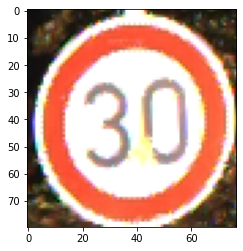

In [ ]:
plt.imshow(imread('/content/FullIJCNN2013/01/00002.ppm'))
imread('/content/FullIJCNN2013/01/00002.ppm').shape

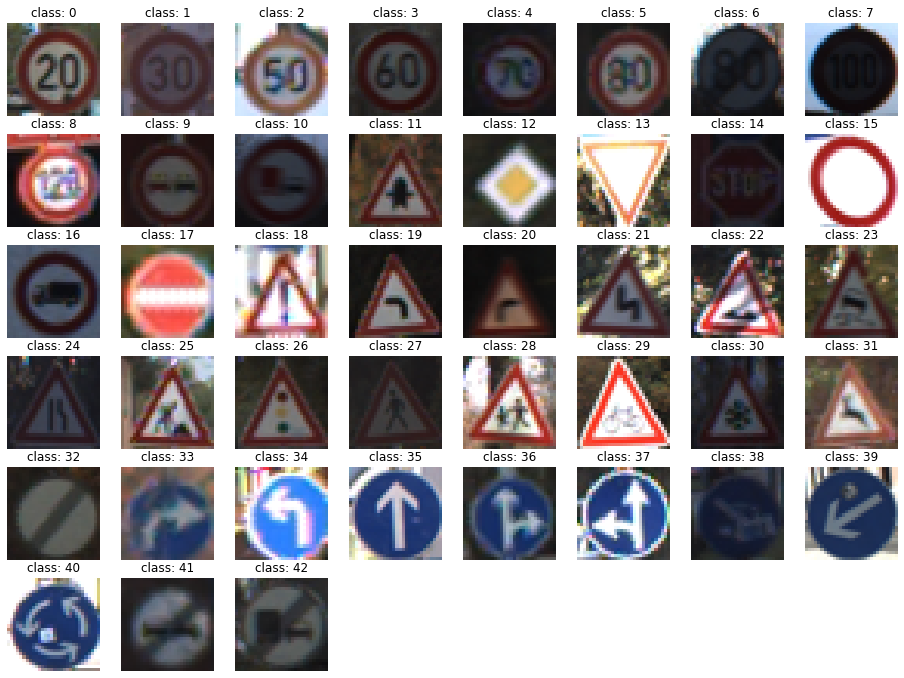

In [ ]:
targets = np.array(labels)
plt.figure(figsize=(16, 16))
for c in range(n_classes):
    i = np.random.choice(np.where(targets == c)[0])
    plt.subplot(8, 8, c+1)
    plt.axis('off')
    plt.title('class: {}'.format(c))
    plt.imshow(features[i])

#### Plot the distribution of Classes

Text(0.5, 1.0, 'histogram')

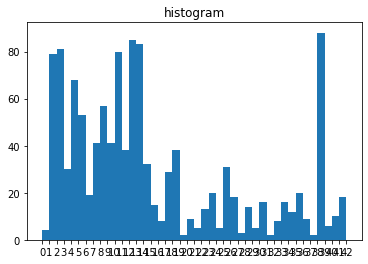

In [ ]:
# Visulization of the histogram
images_per_class, bins, _ = plt.hist(labels,bins=range(n_classes))
plt.xticks(range(n_classes))
plt.title('histogram')

In [ ]:
features_norm = preprocessing.normalize(features1, norm='l2')
features_norm.shape

(1213, 2700)

### Train the MLP classifier on features

* Split the data into train and test

* Train the MLP classifier with different parameters

* Get the accuracy score and performance metrics

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(np.array(features_norm), np.array(labels), test_size=0.2)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((970, 2700), (243, 2700), (970,), (243,))

### Implement simple Neural Networks using keras

* Define the keras model and initialize the layers
  - Ensure the input layer has the right number of input features. This can be specified when creating the first layer with the input_dim argument.
* Compile the model
  - Specify the loss function (to evaluate a set of weights), the optimizer (is used to search through different weights for the network) and any optional metrics to collect and report during training.
* Fit and Evaluate the model
  - Fit the data by specifying epochs and evaluate the model

In [ ]:
# Step 1 - Build the architecture
# Model a simple 3-layer neural network
nn_model = keras.Sequential([
    keras.layers.Flatten(input_shape=[2700]),
    keras.layers.Dense(1350, activation=tf.nn.relu),
    keras.layers.Dense(675, activation=tf.nn.relu),
    keras.layers.Dense(43, activation=tf.nn.softmax)
])
nn_model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2700)              0         
                                                                 
 dense (Dense)               (None, 1350)              3646350   
                                                                 
 dense_1 (Dense)             (None, 675)               911925    
                                                                 
 dense_2 (Dense)             (None, 43)                29068     
                                                                 
Total params: 4,587,343
Trainable params: 4,587,343
Non-trainable params: 0
_________________________________________________________________


In [ ]:
np.array(X_train).shape, Y_train.shape, len(set(labels))

((970, 2700), (970,), 43)

In [ ]:
# Step 2 - Compile the model
nn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
nn_model.fit(X_train, Y_train, epochs=20)

Epoch 1/20
31/31 [==============================] - 3s 4ms/step - loss: 3.4049 - accuracy: 0.0928
Epoch 2/20
31/31 [==============================] - 0s 3ms/step - loss: 2.9227 - accuracy: 0.2536
Epoch 3/20
31/31 [==============================] - 0s 3ms/step - loss: 2.4220 - accuracy: 0.3526
Epoch 4/20
31/31 [==============================] - 0s 3ms/step - loss: 2.0419 - accuracy: 0.4278
Epoch 5/20
31/31 [==============================] - 0s 3ms/step - loss: 1.6850 - accuracy: 0.4845
Epoch 6/20
31/31 [==============================] - 0s 4ms/step - loss: 1.4422 - accuracy: 0.5588
Epoch 7/20
31/31 [==============================] - 0s 3ms/step - loss: 1.2569 - accuracy: 0.6113
Epoch 8/20
31/31 [==============================] - 0s 4ms/step - loss: 1.1136 - accuracy: 0.6464
Epoch 9/20
31/31 [==============================] - 0s 3ms/step - loss: 0.9846 - accuracy: 0.7041
Epoch 10/20
31/31 [==============================] - 0s 3ms/step - loss: 0.8665 - accuracy: 0.7495
Epoch 11/20
31/31 [

In [ ]:
nn_model.evaluate(X_test, Y_test)

8/8 [==============================] - 0s 4ms/step - loss: 0.6545 - accuracy: 0.7942


[0.6545196175575256, 0.7942386865615845]

###**Excercise 4**
### Train a CNN classifier on images (4 points)

* Split the data into train and test

* Train the CNN with 2D convolution and Maxpooling layers

* Get the accuracy score on train and test sets 



* Define the keras model and initialize the layers
  - Ensure the input layer is specified with correct image size as input. This can be specified when creating the first layer with the input_shape argument.
* Speicify number of filters Kernel size, Pool size and activation function
  - filters,kernel_size and activation arguments of Conv2D layer can be used
  - pool_size argument of MaxPool2D can be used to set Pool size
* Compile the model
  - Specify the loss function (to evaluate a set of weights), the optimizer (is used to search through different weights for the network) and any optional metrics to collect and report during training.
* Fit and Evaluate the model
  - Fit the data by specifying epochs and evaluate the model

In [ ]:
# Step 1 - Build the architecture
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape = (30,30,3)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))


In [ ]:
# Step 2 - Compile the model
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 9, 9, 64)          36928     
                                                      

In [ ]:
Y = np.array(labels)

In [ ]:
Y.shape

(1213,)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(np.array(features), Y, stratify = Y, test_size=0.2)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((970, 30, 30, 3), (243, 30, 30, 3), (970,), (243,))

In [ ]:
num_labels = np.unique(Y_train)
print(num_labels)
num_labels = np.unique(Y_test)
print(num_labels)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21 22 23 24
 25 26 28 29 30 32 33 34 35 36 38 39 40 41 42]


In [ ]:
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [ ]:
# Step 3 - Fit and Evaluate the model
eps = 20
history = model.fit(X_train, Y_train, batch_size=32, epochs=eps, validation_data=(X_test, Y_test))

Epoch 1/20
31/31 [==============================] - 1s 20ms/step - loss: 9.1765 - accuracy: 0.0804 - val_loss: 3.5080 - val_accuracy: 0.2387
Epoch 2/20
31/31 [==============================] - 0s 6ms/step - loss: 3.3342 - accuracy: 0.1577 - val_loss: 2.9059 - val_accuracy: 0.3086
Epoch 3/20
31/31 [==============================] - 0s 6ms/step - loss: 2.8889 - accuracy: 0.2845 - val_loss: 2.5044 - val_accuracy: 0.4815
Epoch 4/20
31/31 [==============================] - 0s 6ms/step - loss: 2.4903 - accuracy: 0.3990 - val_loss: 2.0484 - val_accuracy: 0.5473
Epoch 5/20
31/31 [==============================] - 0s 6ms/step - loss: 2.1346 - accuracy: 0.4392 - val_loss: 1.7288 - val_accuracy: 0.5967
Epoch 6/20
31/31 [==============================] - 0s 6ms/step - loss: 1.9196 - accuracy: 0.5072 - val_loss: 1.4470 - val_accuracy: 0.6996
Epoch 7/20
31/31 [==============================] - 0s 6ms/step - loss: 1.6556 - accuracy: 0.5660 - val_loss: 1.2267 - val_accuracy: 0.7284
Epoch 8/20
31/31 [=

#### Experiment using Dropout, Regularization and Batch Normalization

In [ ]:
# With Regularization and DropOut and BatchNormalization
nn_model = keras.Sequential([
    keras.layers.Flatten(input_shape=[2700]),
    keras.layers.Dense(1350, activation=tf.nn.relu,kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(675, activation=tf.nn.relu),
    Dropout(rate=0.1),
    BatchNormalization(),
    keras.layers.Dense(43, activation=tf.nn.softmax)
])

nn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
nn_model.fit(X_train, Y_train, epochs=20)

Epoch 1/20
31/31 [==============================] - 1s 5ms/step - loss: 12.9327 - accuracy: 0.3680
Epoch 2/20
31/31 [==============================] - 0s 5ms/step - loss: 3.9423 - accuracy: 0.6464
Epoch 3/20
31/31 [==============================] - 0s 5ms/step - loss: 1.9789 - accuracy: 0.7330
Epoch 4/20
31/31 [==============================] - 0s 4ms/step - loss: 1.4945 - accuracy: 0.7619
Epoch 5/20
31/31 [==============================] - 0s 5ms/step - loss: 1.2898 - accuracy: 0.8000
Epoch 6/20
31/31 [==============================] - 0s 4ms/step - loss: 1.1563 - accuracy: 0.8216
Epoch 7/20
31/31 [==============================] - 0s 4ms/step - loss: 1.1183 - accuracy: 0.8340
Epoch 8/20
31/31 [==============================] - 0s 4ms/step - loss: 1.0606 - accuracy: 0.8371
Epoch 9/20
31/31 [==============================] - 0s 4ms/step - loss: 0.9916 - accuracy: 0.8567
Epoch 10/20
31/31 [==============================] - 0s 4ms/step - loss: 1.0011 - accuracy: 0.8485
Epoch 11/20
31/31 

In [ ]:
nn_model.evaluate(X_test, Y_test)

8/8 [==============================] - 0s 3ms/step - loss: 1.7391 - accuracy: 0.5967


[1.73906672000885, 0.596707820892334]

In [ ]:
predict_test = nn_model.predict(X_test)
predict_test = np.argmax(predict_test,axis=1)
predict_test

array([ 1,  2, 13, 10, 10, 13, 10, 13, 12,  4,  8,  4,  1, 38,  1,  0,  4,
       12,  1,  4,  7, 33,  4, 38, 13,  4, 18, 17,  8,  4, 17, 15, 11, 38,
       18, 18,  1,  4, 10,  1, 13,  8,  4, 10,  4, 22,  4, 14, 17,  4, 33,
       38, 13,  4,  4,  1,  4, 13,  4,  1,  1,  6,  1,  4,  4, 17,  0,  8,
        6,  7, 12, 13, 21,  8, 12,  1, 12,  8, 21,  2, 13,  1,  4, 28, 13,
       18,  2,  4, 10, 10, 34, 35, 38,  4,  8, 18, 10, 10,  1,  2, 13,  1,
       23,  1, 11,  1, 30,  4, 33, 11,  8, 13,  1,  8,  5,  4, 13,  8, 38,
       13, 13,  8,  4, 25, 17, 38, 13,  4,  1, 12,  7,  1, 12, 13, 33, 18,
       11, 13,  2,  4, 13, 21,  1, 14, 11,  8,  1,  4, 13,  2,  8,  8, 13,
       12,  1,  7, 17, 32,  4,  4, 38,  7, 11,  1,  1, 12,  2,  4, 12,  4,
        4, 13,  1, 10,  1,  4, 15, 38,  1,  4, 13,  4,  1,  4, 13, 35, 25,
        1, 10,  4,  8,  8, 38, 15,  8, 28, 13, 12,  4, 14,  4, 10,  1,  2,
        1,  1, 17,  1,  4, 17, 35,  4, 38, 12, 13, 13,  3,  4,  1,  1, 15,
       12,  2,  7, 33, 13